![header](img/Header.jpg)

# COPERNICUS MARINE WAVE NWS TRAINING (1/3)

<div style="text-align: right"><i> 04-01-WAV </i></div>

***

<center><h1>Loading wave data and examples of visualization</h1></center>


***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Cell" and select "Run All Above Selected Cell".<br>
***

# Table of contents

- [1. Introduction](#intro)
- [2. Setting-up the environment](#env)
- [3. Example A: loading analysis-forecast data (daily files with hourly temporal resolution)](#exA)
- [4. Example B: loading re-analysis data (daily files with 3hourly temporal resolution)](#exB)
- [5. Example C: loading a file delivered from the CMEMS susbsetter (re-analysis file with 3hourly temporal resolution)](#exC)
***

<div class="alert alert-block alert-warning">
    
**This is part I**

If you want, you can go to:
    
- [Part II](04-02-NWS-WaveData-seaSatesEx1.ipynb) - Analysing sea-states - Example from deterministic model data (Storm Xaver)   
- [Part III](04-03-NWS-WaveData-seaSatesEx2.ipynb) - Analysing sea-states - Example from deterministic model data (Storm Dennis)

# 1. Introduction <a class="anchor" id="intro"></a>
[Go back to the "Table of contents"](#Table-of-contents)

This notebook provides an example of loading and rendering of the CMEMS wave data for the North-West European Shelf (herein NWS). All NWS wave products are generated using a WAVEWATCH III (version 4.18) 1.5 km Atlantic Margin configuration. Model products are provided on a regular grid resolved at approximately 1.5km, that is derived from a model with a native grid using a variable resolution: 1/30° x 1/30° (c. 3km) for water depths >40m; 1/60° x 1/60° (c. 1.5km) for water depths <= 40m.

<center><img src="img/AMM15S_domain_cropped.png"></center>
<center>Figure 1. Domain and depth grid for AMM15 wave model (red line).</center>



Two CMEMS wave products can be found for the NWS: 

- wave analysis-forecast: [NORTHWESTSHELF_ANALYSIS_FORECAST_WAV_004_014](https://resources.marine.copernicus.eu/?option=com_csw&view=details&product_id=NORTHWESTSHELF_ANALYSIS_FORECAST_WAV_004_014) also [visible here](https://view-cmems.mercator-ocean.fr/NORTHWESTSHELF_ANALYSIS_FORECAST_WAV_004_014)

- wave reanalysis: [NWSHELF_REANALYSIS_WAV_004_015](https://resources.marine.copernicus.eu/?option=com_csw&view=details&product_id=NWSHELF_REANALYSIS_WAV_004_015) also [visible here](https://view-cmems.mercator-ocean.fr/NWSHELF_REANALYSIS_WAV_004_015).

This notebook provides three examples using different versions of the two CMEMS wave products.

# 2. Setting-up the environment <a class="anchor" id="env"></a>
[Go back to the "Table of contents"](#Table-of-contents)

Our first step is to install a few standard python libraries (numpy, datetime, matplotlib) and a local library for loading the CMEMS wave data (via the netCDF4 library).

In [1]:
# import standard libraries
import datetime
import numpy
import matplotlib.pyplot
import sys
import os

# setting-up the paths
root_dir = os.getcwd()
print(root_dir)

# insert path where the local library is located
sys.path.insert(0,root_dir)

# import local library
import wavetools.loaders.read_CMEMS_wave as rdwv

# set the local data directory
datadir = os.path.join(root_dir,'data')

# set out_dir to save the plots
outdir = os.path.join(root_dir,'img/04_01')

/DATA/shared_trainers/training-NWS/04 Jupyter Notebook - Wave model Products


# 3. Example A: loading analysis-forecast product data<a class="anchor" id="exA"></a>
[Go back to the "Table of contents"](#Table-of-contents)

The files used for this example (total of 8) encompass storm Aiden (28/09/2020). These files follow the nomenclature of files when downloaded through the CMEMS FTP Service; i.e.,`   metoffice_wave_amm15_NWS_WAV_bYYYYMMDD_hiYYYYMMDD.nc` with `bYYYYMMDD` being bulletin (production) date and `hiYYYYMMDD` hourly instantaneous with data validity date YYYYMMDD.

We will need to point the code at files that have been downloaded from CMEMS. The next section of code simply sets the data directory where the files are stored and the analysis/cycle time associated with the files (this is the YYYYMMDD string following the letter 'b' in the file name).

In [2]:
# set year, month and day for the analysis cycle
# NOTE: at present the model cycles once per day, so hour is always set to zero (UTC)
# storm Aiden - analysis/forecast data
year=2020
month=9
day=28
fcday=0

#storm Dennis- analysis data
#year=2020
#month=2
#day=16
# downloaded file is the analysis from 16/02/2020, i.e. fields from the 15th
# so forecast day is set to -1
#fcday=-1

cycle=datetime.datetime(year,month,day,0)


Using a standard netCDF tool such as ncdump, or loading the data via XArray will allow you to inspect the contents of the file. Our local library `read_CMEMS_wave` will also provide a human readable summary of the wave variables in the file and what validity times are available.

The next steps in the code allow us to select one of the NWS wave files and check its content.

In [3]:
# generate a NWS filename based on cycle time and which analysis/forecast day we want (range[-1,5])
ncfile = rdwv.genfilename(cycle,fcday=fcday,datadir=datadir)

# get the content of the chosen netCDF file
rdwv.contentWaveCMEMS(ncfile)

[INFO] Reading content of file: /DATA/shared_trainers/training-NWS/04 Jupyter Notebook - Wave model Products/data/metoffice_wave_amm15_NWS_WAV_b20200928_hi20200928.nc
title: hourly-instantaneous wave
source: Met Office Operational Suite, Atlantic Margin Model (AMM15S 3-1.5km) WAVEWATCH III
analysis/cycle time: 2020-09-27 00:00:00
---
Variables in file:
longitude : longitude
latitude : latitude
time : time
forecast_period : forecast period
forecast_reference_time : forecast reference time
VHM0 : Spectral significant wave height (Hm0)
VTM02 : Spectral moments (0,2) wave period Tm02
VTM10 : Spectral moments (-1,0) wave period (Tm-10)
VTPK : Wave period at spectral peak / peak period (Tp)
VMDR : Mean wave direction from (Mdir)
VPED : Wave principal direction at spectral peak
VHM0_WW : Spectral significant wind wave height
VHM0_SW1 : Spectral significant primary swell wave height
VHM0_SW2 : Spectral significant secondary swell wave height
VMDR_WW : Mean wind wave direction from
VMDR_SW1 : M


Now try loading some data. Each CMEMS wave file comprises 24 hours of data from the zeroth time index; so if we are loading data with forecasts running over consecutive days, the loader will loop over consecutive files.

In [4]:
# set a leadtime range (possible range [-24,120] in hours, corresponding to -1 to 5 days)
leadtimes=[-12,36]

# if using the storm Dennis example range is [-24,-1]
#leadtimes = [-24,-1]

# set the variable to retrieve (e.g. from list above)
varname = 'VHM0'
# for peak period use 
#varname = 'VTPK'
var = rdwv.readWaveCMEMS(varname, cycle=cycle, leadtimes=leadtimes, datadir=datadir)

# var is a class for the loaded data - show the available attributes
print()
print('var is a python object with the following keys:')
print(var.__dict__.keys())
# print the shape of the loaded data [t,y,x]
print('array shape for data loaded into var is as follows:')
print(numpy.shape(var.data))

[INFO] Reading time indices 12 to 24 from /DATA/shared_trainers/training-NWS/04 Jupyter Notebook - Wave model Products/data/metoffice_wave_amm15_NWS_WAV_b20200928_hi20200927.nc
[INFO] Loading VHM0 data from /DATA/shared_trainers/training-NWS/04 Jupyter Notebook - Wave model Products/data/metoffice_wave_amm15_NWS_WAV_b20200928_hi20200927.nc
[INFO] Reading time indices 0 to 24 from /DATA/shared_trainers/training-NWS/04 Jupyter Notebook - Wave model Products/data/metoffice_wave_amm15_NWS_WAV_b20200928_hi20200928.nc
[INFO] Loading VHM0 data from /DATA/shared_trainers/training-NWS/04 Jupyter Notebook - Wave model Products/data/metoffice_wave_amm15_NWS_WAV_b20200928_hi20200928.nc
[INFO] Concatenating time axis data
[INFO] Reading time indices 0 to 13 from /DATA/shared_trainers/training-NWS/04 Jupyter Notebook - Wave model Products/data/metoffice_wave_amm15_NWS_WAV_b20200928_hi20200929.nc
[INFO] Loading VHM0 data from /DATA/shared_trainers/training-NWS/04 Jupyter Notebook - Wave model Product

<b><u>Exercise</u>:</b> 

a) Change the variable imported into var (e.g., peak period "VTPK").
    
b) Try updating the forecast day field (-1 to 5); changes leadtime and validity times for storm Aiden. 
    
c) Try changing to period of storm Dennis (16/02/2020) 
    - First, modify the year, month, day and fcday. 
    - Second, change leadtime.


The data we have loaded is in a gridded format, so can simply be inspected using basic matplotlib functions.

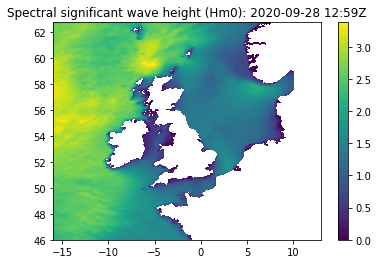

In [5]:
# set a time index for the plot
time_index = 25

# plot gridded field using pcolormesh
gvar = matplotlib.pyplot.pcolormesh(var.glons,var.glats,var.data[time_index,:,:])
cb = matplotlib.pyplot.colorbar()

# generate a title using the long name and validity time values
title = '%s: %s' %(var.longname, var.times[time_index].strftime('%Y-%m-%d %H:%MZ'))
matplotlib.pyplot.title(title)

# save the plot
out_name = os.path.join(outdir,'storm_ExA.png')
matplotlib.pyplot.savefig(out_name,bbox_inches="tight", pad_inches=0.1, dpi=150)

# show the plot
matplotlib.pyplot.show()

<b><u>Exercise</u>:</b> Re-run plot with changed variable name and time_index.

# 4. Example B: loading re-analysis data<a class="anchor" id="exB"></a>
[Go back to the "Table of contents"](#Table-of-contents)

This uses the same methods as for analysis-forecast data; however we need to let the `read_CMEMS_wave` library functions know that we are using re-analysis data, as the files are slightly different.

The file used for this example is for storm Xaver (05/12/2013), and follow the nomenclature of files when downloaded through the CMEMS FTP Service; i.e., `metoffice_wave_amm15_NWS_WAV_3hiYYYYMMDD.nc` with `3hi` being 3hourly instantaneous temporal resolution and `YYYYMMDD` date integer corrresponding to the analysis date. 

In [6]:
# set year, month and day for the analysis cycle
#storm xaver - re-analysis data
year=2013
month=12
day=5

cycle=datetime.datetime(year,month,day,0)

Generate the re-analysis file name and inspect the file.

In [7]:
# generate an NWS filename based on cycle time and which analysis/forecast day we want (range[-1,5])
ncfile = rdwv.genfilename(cycle, reanalysis=True, datadir=datadir)

# get the content of the chosen netCDF file
rdwv.contentWaveCMEMS(ncfile)

[INFO] Reading content of file: /DATA/shared_trainers/training-NWS/04 Jupyter Notebook - Wave model Products/data/metoffice_wave_amm15_NWS_WAV_3hi20131205.nc
title: 3-hourly-instantaneous wave
source: Met Office Operational Suite, Atlantic Margin Model (AMM15S 3-1.5km) WAVEWATCH III
---
Variables in file:
longitude : longitude
latitude : latitude
time : time
VHM0 : Spectral significant wave height (Hm0)
VTM02 : Spectral moments (0,2) wave period Tm02
VTM10 : Spectral moments (-1,0) wave period (Tm-10)
VTPK : Wave period at spectral peak / peak period (Tp)
VMDR : Mean wave direction from (Mdir)
VPED : Wave principal direction at spectral peak
VHM0_WW : Spectral significant wind wave height
VHM0_SW1 : Spectral significant primary swell wave height
VHM0_SW2 : Spectral significant secondary swell wave height
VMDR_WW : Mean wind wave direction from
VMDR_SW1 : Mean primary swell wave direction from
VMDR_SW2 : Mean secondary swell wave direction from
VTM01_WW : Spectral moments (0,1) wind wav

In [8]:
# set the variable to retrieve (e.g. from list above)
varname = 'VHM0'
var = rdwv.readWaveCMEMS(varname, cycle=cycle, reanalysis=True, datadir=datadir)

# if we want to get the module of a field
#varnamex = 'VSDX'
#varnamey = 'VSDY'
#vary = rdwv.readWaveCMEMS(varnamex, cycle=cycle, reanalysis=True, datadir=datadir)
#vary = rdwv.readWaveCMEMS(varnamey, cycle=cycle, reanalysis=True, datadir=datadir)
#var_mod = numpy.sqrt(varx.data**2+vary.data**2)

# var is a class for the loaded data - show the available attributes
print()
print('var is a python object with the following keys:')
print(var.__dict__.keys())
# print the shape of the loaded data [t,y,x]
print('array shape for data loaded into var is as follows:')
print(numpy.shape(var.data))

[INFO] Reading all time indices from /DATA/shared_trainers/training-NWS/04 Jupyter Notebook - Wave model Products/data/metoffice_wave_amm15_NWS_WAV_3hi20131205.nc
[INFO] Loading VHM0 data from /DATA/shared_trainers/training-NWS/04 Jupyter Notebook - Wave model Products/data/metoffice_wave_amm15_NWS_WAV_3hi20131205.nc

var is a python object with the following keys:
dict_keys(['var', 'longname', 'standard', 'glats', 'glons', 'times', 'fcref', 'fclead', 'data', 'units'])
array shape for data loaded into var is as follows:
(8, 1240, 958)


Once loaded in, we can work with the hindcast data in exactly the same way we would for the analysis-forecast data in example A.

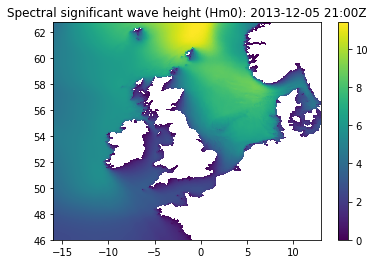

In [9]:
# set a time index
time_index = 7

# plot gridded field using pcolormesh
gvar = matplotlib.pyplot.pcolormesh(var.glons,var.glats,var.data[time_index,:,:])
#gvar = matplotlib.pyplot.pcolormesh(var.glons,var.glats,var_mod[time_index,:,:])

cb = matplotlib.pyplot.colorbar()

# generate a title using the long name and validity time values
title = '%s: %s' %(var.longname, var.times[time_index].strftime('%Y-%m-%d %H:%MZ'))
# if module of variable
#str_name_mod = 'Stokes drift ($U_{st}$)'
#title = '%s: %s' %(str_name_mod, varx.times[time_index].strftime('%Y-%m-%d %H:%MZ'))

matplotlib.pyplot.title(title)

# save the plot
out_name = os.path.join(outdir,'storm_ExB.png')
matplotlib.pyplot.savefig(out_name,bbox_inches="tight", pad_inches=0.1, dpi=150)

# show the plot
matplotlib.pyplot.show()

<b><u>Exercise</u>:</b> Re-run plotting cell with changed variable name (e.g., stokes drift VSDX and VSDY) and time_index (e.g., = 6).

<div class="alert alert-block alert-info">
    <b>TIP:</b> Module can be obtained as numpy.sqrt($x^2$+$y^2$)

# 5. Example C: loading a file delivered from the CMEMS susbsetter<a class="anchor" id="exC"></a>
[Go back to the "Table of contents"](#Table-of-contents)

Files from the CMEMS subsetter come back with a unique name, so the `read_CMEMS_wave` function will also work directly with a filename. 

For this example we use a re-analysis file (3hourly temporal resolution) for storm Xaver (05/12/2013). This file follows the nomenclature of files when downloaded using the subsetter tool i.e., `MetO-NWS-WAV-RAN_nnnnnnnnnnnnn.nc` with `nnnnnnnnnnnnn` being a 13 digit integer corresponding to the download time in milliseconds since January 1, 1970 midnight UTC.

In [10]:
filename = 'MetO-NWS-WAV-RAN_1601465008752.nc'
#filename = 'MetO-NWS-WAV-hi_1601560593058.nc'

# get the content of the chosen netCDF file
rdwv.contentWaveCMEMS(datadir+'/'+filename)

[INFO] Reading content of file: /DATA/shared_trainers/training-NWS/04 Jupyter Notebook - Wave model Products/data/MetO-NWS-WAV-RAN_1601465008752.nc
title: 3-hourly-instantaneous wave
source: Met Office Operational Suite, Atlantic Margin Model (AMM15S 3-1.5km) WAVEWATCH III
---
Variables in file:
VHM0_WW : Spectral significant wind wave height
latitude : latitude
VMDR_SW2 : Mean secondary swell wave direction from
VMDR : Mean wave direction from (Mdir)
VMDR_SW1 : Mean primary swell wave direction from
VTM10 : Spectral moments (-1,0) wave period (Tm-10)
VPED : Wave principal direction at spectral peak
VTPK : Wave period at spectral peak / peak period (Tp)
VTM02 : Spectral moments (0,2) wave period Tm02
VHM0_SW1 : Spectral significant primary swell wave height
VMDR_WW : Mean wind wave direction from
VTM01_SW2 : Spectral moments (0,1) secondary swell wave period
VSDX : Stokes drift U
VTM01_SW1 : Spectral moments (0,1) primary swell wave period
VSDY : Stokes drift V
time : time
VHM0 : Spect

In [11]:
# set the variable to retrieve (e.g. from list above)
varname = 'VHM0'
var = rdwv.readWaveCMEMS(varname, filename=filename, datadir=datadir)

# var is a class for the loaded data - show the available attributes
print()
print('var is a python object with the following keys:')
print(var.__dict__.keys())
# print the shape of the loaded data [t,y,x]
print('array shape for data loaded into var is as follows:')
print(numpy.shape(var.data))

[INFO] Reading all time indices from /DATA/shared_trainers/training-NWS/04 Jupyter Notebook - Wave model Products/data/MetO-NWS-WAV-RAN_1601465008752.nc
[INFO] Loading VHM0 data from /DATA/shared_trainers/training-NWS/04 Jupyter Notebook - Wave model Products/data/MetO-NWS-WAV-RAN_1601465008752.nc

var is a python object with the following keys:
dict_keys(['var', 'longname', 'standard', 'glats', 'glons', 'times', 'fcref', 'fclead', 'data', 'units'])
array shape for data loaded into var is as follows:
(9, 1240, 958)


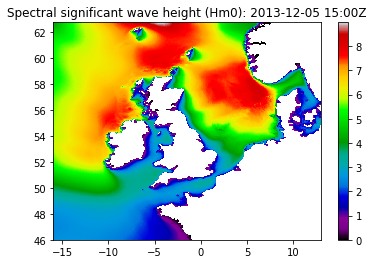

In [12]:
# set a time index
time_index = 5

# plot gridded field using pcolormesh
gvar = matplotlib.pyplot.pcolormesh(var.glons,var.glats,var.data[time_index,:,:],cmap='nipy_spectral')
cb = matplotlib.pyplot.colorbar()

# generate a title using the long name and validity time values
title = '%s: %s' %(var.longname, var.times[time_index].strftime('%Y-%m-%d %H:%MZ'))
matplotlib.pyplot.title(title)

# save the plot
out_name = os.path.join(outdir,'storm_ExC.png')
matplotlib.pyplot.savefig(out_name,bbox_inches="tight", pad_inches=0.1, dpi=150)

# show the plot
matplotlib.pyplot.show()

<b><u>Exercise</u>:</b> Try loading a different dataset extracted from subsetter (e.g., now analysis/forecast data MetO-NWS-WAV-hi_1601560593058.nc)

***
<div class="alert alert-block alert-success">


## Next Tutorial

_Click on the hyperlink below to continue the training_

[Part II](04-02-NWS-WaveData-seaSatesEx1.ipynb) : Analysing sea-states example from deterministic model data (Storm Xaver)